In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', 500)

# Data Cleaning and Preprocessing

Loading Data

In [2]:
DATA_DIR = '/Users/seancollins/Desktop/DATA 3000 Project/mens-march-mania-2022/MDataFiles_Stage2/'
for filename in os.listdir(DATA_DIR):
    print(filename)

MNCAATourneyDetailedResults.csv
MNCAATourneyCompactResults.csv
MSeasons.csv
MMasseyOrdinals_thruDay128.csv
MRegularSeasonDetailedResults.csv
MNCAATourneySlots.csv
MGameCities.csv
MConferenceTourneyGames.csv
Cities.csv
MRegularSeasonCompactResults.csv
MNCAATourneySeedRoundSlots.csv
MTeamConferences.csv
MSampleSubmissionStage2.csv
MTeamCoaches.csv
Conferences.csv
MTeams.csv
MNCAATourneySeeds.csv
MSecondaryTourneyTeams.csv
MTeamSpellings.csv
MSecondaryTourneyCompactResults.csv


In [3]:
reg_season = pd.read_csv(DATA_DIR + 'MRegularSeasonDetailedResults.csv')
tournament = pd.read_csv(DATA_DIR + 'MNCAATourneyDetailedResults.csv')
team_ids = pd.read_csv(DATA_DIR + 'MTeams.csv')
seeds = pd.read_csv(DATA_DIR + 'MNCAATourneySeeds.csv')
sample_submission = pd.read_csv(DATA_DIR + 'MSampleSubmissionStage2.csv')
conferences = pd.read_csv(DATA_DIR + 'Conferences.csv')

In [4]:
reg_season.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14


In [5]:
#home and away
reg_season['WLoc'] = reg_season['WLoc'].apply(lambda x: 1 if x=='H' else 0)
reg_season['LLoc'] = 1 - reg_season['WLoc']

In [6]:
reg_season.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'LLoc'],
      dtype='object')

Get each row in the dataframe to be unique to one team in one season

In [7]:
winners = pd.DataFrame()
losers = pd.DataFrame()

cols = ['Season', 'TeamID', 'Score', 'OppScore', 'Loc',
       'NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM','FTA', 'OR', 'DR',
       'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA', 'OppFGM3', 'OppFGA3',
       'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO', 'OppStl',
       'OppBlk', 'OppPF', 'OppLoc']

winners[cols] = reg_season[['Season', 'WTeamID', 'WScore', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'LLoc']]

winners['Wins'] = 1

winners['Losses'] = 0

losers[cols] = reg_season[['Season', 'LTeamID', 'LScore', 'WScore', 'LLoc',
       'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR',
       'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3',
       'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'WLoc']]

losers['Wins'] = 0

losers['Losses'] = 1

winnersandlosers = pd.concat([winners, losers])

In [8]:
winnersandlosers

,Season,TeamID,Score,OppScore,Loc,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,OppFGM,OppFGA,OppFGM3,OppFGA3,OppFTM,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,OppLoc,Wins,Losses
0,2003,1104,68,62,0,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,1,1,0
1,2003,1272,70,63,0,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,1,1,0
2,2003,1266,73,61,0,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,1,1,0
3,2003,1296,56,50,0,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,1,1,0
4,2003,1400,77,71,0,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102027,2022,1272,53,71,1,0,22,51,1,10,8,14,9,25,15,15,5,4,19,25,58,8,24,13,19,13,21,20,9,10,3,16,0,0,1
102028,2022,1345,66,75,1,0,25,59,5,20,11,17,17,31,13,17,4,2,22,26,61,8,28,15,23,10,20,15,6,13,3,17,0,0,1
102029,2022,1172,62,64,1,0,19,51,9,27,15,17,4,26,12,9,4,2,16,22,51,5,16,15,18,4,29,8,11,5,0,17,0,0,1
102030,2022,1401,50,65,1,0,16,51,4,19,14,18,10,24,6,12,6,0,14,22,56,12,28,9,14,12,29,19,13,8,4,14,0,0,1


In [9]:
df = winnersandlosers.groupby(['Season', 'TeamID']).sum()

In [10]:
df['NumGames'] = df['Wins'] + df['Losses']

In [11]:
df

Score  OppScore  Loc  NumOT  FGM   FGA  FGM3  FGA3  FTM  FTA  \
Season TeamID                                                                 
2003   1102     1603      1596   15      0  536  1114   219   583  312  479   
       1103     2127      2110   14      8  733  1508   147   434  514  698   
       1104     1940      1820   16      1  673  1601   178   556  416  586   
       1105     1866      1993   12      4  634  1602   197   540  401  568   
       1106     1781      1785   14      1  656  1548   171   494  298  461   
...              ...       ...  ...    ...  ...   ...   ...   ...  ...  ...   
2022   1468     1971      2043   12      1  739  1601   229   670  264  352   
       1469     1838      2054   13      1  647  1578   174   589  370  555   
       1470     1768      1843   12      1  621  1498   145   469  381  505   
       1471     1846      1934   12      1  629  1438   237   659  351  470   
       1472     1962      2112   10      0  697  1604   275   800  293  380   

                OR   DR  Ast   TO  Stl  Blk   PF  OppFGM  OppFGA  OppFGM3  \
Season TeamID                                                               
2003   1102    117  471  364  320  167   50  525     540    1188      133   
       1103    264  538  411  341  196   63  536     750    1539      180   
       1104    380  670  339  372  185  106  505     651    1554      178   
       1105    351  601  378  485  242   54  526     702    1533      163   
       1106    344  668  327  477  234   88  509     608    1495      134   
...            ...  ...  ...  ...  ...  ...  ...     ...     ...      ...   
2022   1468    178  586  387  254  151   41  439     725    1571      259   
       1469    229  650  389  405  165   67  524     745    1663      202   
       1470    209  516  293  287  209   59  502     644    1421      201   
       1471    128  596  356  331  145   49  404     757    1599      170   
       1472    161  529  310  210  129   29  471     758    1491      239   

               OppFGA3  OppFTM  OppFTA  OppOR  OppDR  OppAst  OppTO  OppStl  \
Season TeamID                                                                 
2003   1102        348     383     539    269    564     256    363     152   
       1103        496     430     598    325    595     418    414     173   
       1104        536     340     480    305    634     327    388     155   
       1105        456     426     637    343    686     411    489     244   
       1106        426     435     615    317    626     330    422     246   
...                ...     ...     ...    ...    ...     ...    ...     ...   
2022   1468        740     334     474    248    655     380    316     147   
       1469        612     362     510    254    712     402    332     223   
       1470        611     354     506    249    650     382    431     135   
       1471        517     250     351    221    668     354    304     171   
       1472        596     357     484    194    705     361    284      94   

               OppBlk  OppPF  OppLoc  Wins  Losses  NumGames  
Season TeamID                                                 
2003   1102        44    514      13    12      16        28  
       1103        77    606      13    13      14        27  
       1104        89    539      12    17      11        28  
       1105       109    496      14     7      19        26  
       1106        89    452      14    13      15        28  
...               ...    ...     ...   ...     ...       ...  
2022   1468        69    438      17    16      13        29  
       1469       110    545      14     9      18        27  
       1470       145    490      16    11      17        28  
       1471        69    458      15    11      16        27  
       1472        85    434      17     7      20        27  

[6892 rows x 34 columns]

# Feature Engineering

In [12]:
features_df = pd.DataFrame()

In [13]:
#shooting percentage
features_df['FGpct'] = round(df['FGM'] / df['FGA'], 3)

In [14]:
#free throw percentage
features_df['FTpct'] = round(df['FTM'] / df['FTA'], 3)

In [15]:
#3 point shooting percentage
features_df['3FGpct'] = round(df['FGM3'] / df['FGA3'], 3)

In [16]:
#assist to turnover ratio
features_df['Ast/TO'] = round(df['Ast'] / df['TO'], 3)

In [17]:
#points per game
features_df['PPG'] = round(df['Score'] / df['NumGames'], 3)

In [18]:
#points given up per game
features_df['OppPPG'] = round(df['OppScore'] / df['NumGames'], 3)

In [19]:
#average turnover margin
features_df['AvgTOMargin'] = round((df['TO'] - df['OppTO']) / df['NumGames'], 3)

In [20]:
#average rebounding margin
features_df['AvgRebMargin'] = round(((df['OR'] + df['DR']) - (df['OppOR'] + df['OppDR'])) / df['NumGames'], 3)

In [21]:
#average point differential
features_df['PointsDiff'] = features_df['PPG'] - features_df['OppPPG']

In [22]:
#true shooting percentage
features_df['TS'] = round(df['Score'] / (2 * (df['FGA'] + (.44 * df['FTA']))), 3)

In [23]:
#winning percentage 
features_df['Wpct'] = df['Wins'] / df['NumGames']

In [24]:
#turnovers
features_df['TO'] = df['TO']

In [25]:
features_df

FGpct  FTpct  3FGpct  Ast/TO     PPG  OppPPG  AvgTOMargin  \
Season TeamID                                                              
2003   1102    0.481  0.651   0.376   1.138  57.250  57.000       -1.536   
       1103    0.486  0.736   0.339   1.205  78.778  78.148       -2.704   
       1104    0.420  0.710   0.320   0.911  69.286  65.000       -0.571   
       1105    0.396  0.706   0.365   0.779  71.769  76.654       -0.154   
       1106    0.424  0.646   0.346   0.686  63.607  63.750        1.964   
...              ...    ...     ...     ...     ...     ...          ...   
2022   1468    0.462  0.750   0.342   1.524  67.966  70.448       -2.138   
       1469    0.410  0.667   0.295   0.960  68.074  76.074        2.704   
       1470    0.415  0.754   0.309   1.021  63.143  65.821       -5.143   
       1471    0.437  0.747   0.360   1.076  68.370  71.630        1.000   
       1472    0.435  0.771   0.344   1.476  72.667  78.222       -2.741   

               AvgRebMargin  PointsDiff     TS      Wpct   TO  
Season TeamID                                                  
2003   1102          -8.750       0.250  0.605  0.428571  320  
       1103          -4.370       0.630  0.586  0.481481  341  
       1104           3.964       4.286  0.522  0.607143  372  
       1105          -2.962      -4.885  0.504  0.269231  485  
       1106           2.464      -0.143  0.509  0.464286  477  
...                     ...         ...    ...       ...  ...  
2022   1468          -4.793      -2.482  0.561  0.551724  254  
       1469          -3.222      -8.000  0.504  0.333333  405  
       1470          -6.214      -2.678  0.514  0.392857  287  
       1471          -6.111      -3.260  0.561  0.407407  331  
       1472          -7.741      -5.555  0.554  0.259259  210  

[6892 rows x 12 columns]

# Tournament Detailed Results (Training Data)

In [26]:
tournament.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19


In [27]:
tournament.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [28]:
# create a team list
cols = [
    'Season', 'DayNum', 'WTeamID', 
    'LTeamID', 'WScore', 'LScore', 
]
train_df = tournament[cols].copy()
train_df

,Season,DayNum,WTeamID,LTeamID,WScore,LScore
0,2003,134,1421,1411,92,84
1,2003,136,1112,1436,80,51
2,2003,136,1113,1272,84,71
3,2003,136,1141,1166,79,73
4,2003,136,1143,1301,76,74
...,...,...,...,...,...,...
1176,2021,148,1211,1425,85,66
1177,2021,148,1417,1276,51,49
1178,2021,152,1124,1222,78,59
1179,2021,152,1211,1417,93,90


In [29]:
#merge the seeds
train_df = pd.merge(train_df, seeds, how='left', left_on=['Season', 'WTeamID'], 
                    right_on=['Season', 'TeamID'])
train_df = pd.merge(train_df, seeds, how='left', left_on=['Season', 'LTeamID'],
                    right_on=['Season', 'TeamID'])

In [30]:
train_df = train_df.drop(['TeamID_x', 'TeamID_y'], axis=1)

In [31]:
train_df

,Season,DayNum,WTeamID,LTeamID,WScore,LScore,Seed_x,Seed_y
0,2003,134,1421,1411,92,84,X16b,X16a
1,2003,136,1112,1436,80,51,Z01,Z16
2,2003,136,1113,1272,84,71,Z10,Z07
3,2003,136,1141,1166,79,73,Z11,Z06
4,2003,136,1143,1301,76,74,W08,W09
...,...,...,...,...,...,...,...,...
1176,2021,148,1211,1425,85,66,X01,X06
1177,2021,148,1417,1276,51,49,W11b,W01
1178,2021,152,1124,1222,78,59,Z01,Y02
1179,2021,152,1211,1417,93,90,X01,W11b


In [32]:
def fix_seeds(seed):
    # print("Original Seed:", seed)
    fixed_seed = int(re.sub("[^0-9]", "", seed))
    # print("Treated Seed:", fixed_seed)
    return fixed_seed

train_df['WSeed'] = train_df['Seed_x'].apply(fix_seeds)
train_df['LSeed'] = train_df['Seed_y'].apply(fix_seeds)

In [33]:
train_df = train_df.drop(['Seed_x', 'Seed_y'], axis=1)

In [34]:
train_df

,Season,DayNum,WTeamID,LTeamID,WScore,LScore,WSeed,LSeed
0,2003,134,1421,1411,92,84,16,16
1,2003,136,1112,1436,80,51,1,16
2,2003,136,1113,1272,84,71,10,7
3,2003,136,1141,1166,79,73,11,6
4,2003,136,1143,1301,76,74,8,9
...,...,...,...,...,...,...,...,...
1176,2021,148,1211,1425,85,66,1,6
1177,2021,148,1417,1276,51,49,11,1
1178,2021,152,1124,1222,78,59,1,2
1179,2021,152,1211,1417,93,90,1,11


In [35]:
#merge with features
train_df = pd.merge(train_df, features_df, how='left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])

train_df = pd.merge(train_df, features_df, how='left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'])

In [36]:
train_df

,Season,DayNum,WTeamID,LTeamID,WScore,LScore,WSeed,LSeed,FGpct_x,FTpct_x,3FGpct_x,Ast/TO_x,PPG_x,OppPPG_x,AvgTOMargin_x,AvgRebMargin_x,PointsDiff_x,TS_x,Wpct_x,TO_x,FGpct_y,FTpct_y,3FGpct_y,Ast/TO_y,PPG_y,OppPPG_y,AvgTOMargin_y,AvgRebMargin_y,PointsDiff_y,TS_y,Wpct_y,TO_y
0,2003,134,1421,1411,92,84,16,16,0.429,0.763,0.360,0.804,71.207,78.448,3.379,-1.103,-7.241,0.539,0.448276,470,0.448,0.620,0.321,0.932,72.800,70.833,0.900,3.167,1.967,0.538,0.600000,457
1,2003,136,1112,1436,80,51,1,16,0.461,0.701,0.351,1.193,85.214,70.250,-2.071,6.429,14.964,0.555,0.892857,414,0.444,0.658,0.341,1.010,67.793,63.138,1.069,7.241,4.655,0.526,0.655172,408
2,2003,136,1113,1272,84,71,10,7,0.478,0.670,0.318,1.111,75.966,69.172,-1.517,5.448,6.794,0.555,0.620690,406,0.438,0.654,0.349,1.205,74.517,65.828,-1.276,4.103,8.689,0.532,0.793103,400
3,2003,136,1141,1166,79,73,11,6,0.505,0.766,0.381,0.856,79.345,73.241,2.172,2.724,6.104,0.622,0.793103,529,0.499,0.693,0.389,1.259,79.242,64.333,-3.697,1.636,14.909,0.598,0.878788,441
4,2003,136,1143,1301,76,74,8,9,0.466,0.686,0.377,1.129,74.483,69.759,-0.759,1.448,4.724,0.553,0.724138,411,0.456,0.770,0.354,1.033,72.400,68.000,-0.433,-0.200,4.400,0.581,0.600000,426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1211,1425,85,66,1,6,0.551,0.726,0.365,1.535,92.115,69.115,-2.538,7.423,23.000,0.640,1.000000,310,0.467,0.647,0.348,1.128,74.759,65.103,1.103,6.793,9.656,0.552,0.758621,351
1177,2021,148,1417,1276,51,49,11,1,0.462,0.721,0.367,1.251,72.846,68.500,-0.269,4.846,4.346,0.558,0.653846,283,0.484,0.778,0.387,1.449,76.250,65.375,1.167,6.542,10.875,0.587,0.833333,256
1178,2021,152,1124,1222,78,59,1,2,0.493,0.697,0.418,1.401,84.375,66.417,-4.667,4.292,17.958,0.598,0.916667,292,0.438,0.743,0.355,1.348,76.308,58.308,-3.654,10.231,18.000,0.553,0.884615,264
1179,2021,152,1211,1417,93,90,1,11,0.551,0.726,0.365,1.535,92.115,69.115,-2.538,7.423,23.000,0.640,1.000000,310,0.462,0.721,0.367,1.251,72.846,68.500,-0.269,4.846,4.346,0.558,0.653846,283


In [37]:
def replace_win_loser(df):
    team_a = df.copy()
    team_b = df.copy()
    
    team_a_dict, team_b_dict = {}, {}
    
    for col in team_a.columns:
        if col.find('W') == 0:
            new_col_name = str(col).replace('W', 'A_')
            team_a_dict[col] = new_col_name
        if col.find('L') == 0:
            new_col_name = str(col).replace('L', 'B_')    
            team_a_dict[col] = new_col_name
        if col.find('_x') > 0:
            new_col_name = str(col).replace('_x', '_A')
            team_a_dict[col] = new_col_name
        if col.find('_y') > 0:
            new_col_name = str(col).replace('_y', '_B')    
            team_a_dict[col] = new_col_name
            
    for col in team_b.columns:
        if col.find('W') == 0:
            new_col_name = str(col).replace('W', 'B_')
            team_b_dict[col] = new_col_name
        if col.find('L') == 0:
            new_col_name = str(col).replace('L', 'A_')
            team_b_dict[col] = new_col_name
        if col.find('_x') > 0:
            new_col_name = str(col).replace('_x', '_B')
            team_b_dict[col] = new_col_name
        if col.find('_y') > 0:
            new_col_name = str(col).replace('_y', '_A')    
            team_b_dict[col] = new_col_name

    team_a = team_a.rename(columns = team_a_dict)
    team_b = team_b.rename(columns = team_b_dict)
    
    merged_df = pd.concat([team_a, team_b], axis = 0, sort = False)
    return merged_df

In [38]:
train_df2 = replace_win_loser(train_df).reset_index(drop=True)

In [39]:
train_df2.head()

,Season,DayNum,A_TeamID,B_TeamID,A_Score,B_Score,A_Seed,B_Seed,FGpct_A,FTpct_A,3FGpct_A,Ast/TO_A,PPG_A,OppPPG_A,AvgTOMargin_A,AvgRebMargin_A,PointsDiff_A,TS_A,Wpct_A,TO_A,FGpct_B,FTpct_B,3FGpct_B,Ast/TO_B,PPG_B,OppPPG_B,AvgTOMargin_B,AvgRebMargin_B,PointsDiff_B,TS_B,Wpct_B,TO_B
0,2003,134,1421,1411,92,84,16,16,0.429,0.763,0.360,0.804,71.207,78.448,3.379,-1.103,-7.241,0.539,0.448276,470,0.448,0.620,0.321,0.932,72.800,70.833,0.900,3.167,1.967,0.538,0.600000,457
1,2003,136,1112,1436,80,51,1,16,0.461,0.701,0.351,1.193,85.214,70.250,-2.071,6.429,14.964,0.555,0.892857,414,0.444,0.658,0.341,1.010,67.793,63.138,1.069,7.241,4.655,0.526,0.655172,408
2,2003,136,1113,1272,84,71,10,7,0.478,0.670,0.318,1.111,75.966,69.172,-1.517,5.448,6.794,0.555,0.620690,406,0.438,0.654,0.349,1.205,74.517,65.828,-1.276,4.103,8.689,0.532,0.793103,400
3,2003,136,1141,1166,79,73,11,6,0.505,0.766,0.381,0.856,79.345,73.241,2.172,2.724,6.104,0.622,0.793103,529,0.499,0.693,0.389,1.259,79.242,64.333,-3.697,1.636,14.909,0.598,0.878788,441
4,2003,136,1143,1301,76,74,8,9,0.466,0.686,0.377,1.129,74.483,69.759,-0.759,1.448,4.724,0.553,0.724138,411,0.456,0.770,0.354,1.033,72.400,68.000,-0.433,-0.200,4.400,0.581,0.600000,426


In [40]:
train_df2.columns

Index(['Season', 'DayNum', 'A_TeamID', 'B_TeamID', 'A_Score', 'B_Score',
       'A_Seed', 'B_Seed', 'FGpct_A', 'FTpct_A', '3FGpct_A', 'Ast/TO_A',
       'PPG_A', 'OppPPG_A', 'AvgTOMargin_A', 'AvgRebMargin_A', 'PointsDiff_A',
       'TS_A', 'Wpct_A', 'TO_A', 'FGpct_B', 'FTpct_B', '3FGpct_B', 'Ast/TO_B',
       'PPG_B', 'OppPPG_B', 'AvgTOMargin_B', 'AvgRebMargin_B', 'PointsDiff_B',
       'TS_B', 'Wpct_B', 'TO_B'],
      dtype='object')

In [41]:
#get differences between team A and team B
cols = ['Seed']

for col in cols:
    train_df2[col + 'Diff'] = train_df2['A_'+col] - train_df2['B_'+col]

cols2 = ['TS', 'TO', 'Ast/TO', 'FTpct', 'Wpct', 'AvgRebMargin', 
         'FGpct', '3FGpct', 'PPG', 'OppPPG', 'AvgTOMargin', 'PointsDiff', 'Wpct']

for col in cols2:
    train_df2[col + 'Diff'] = train_df2[col+'_A'] - train_df2[col+'_B']


In [42]:
#create target variable
train_df2['ScoreDiff'] = train_df2['A_Score'] - train_df2['B_Score']
train_df2['A_Win'] = (train_df2['ScoreDiff'] > 0).astype(int)

In [43]:
train_df2

,Season,DayNum,A_TeamID,B_TeamID,A_Score,B_Score,A_Seed,B_Seed,FGpct_A,FTpct_A,3FGpct_A,Ast/TO_A,PPG_A,OppPPG_A,AvgTOMargin_A,AvgRebMargin_A,PointsDiff_A,TS_A,Wpct_A,TO_A,FGpct_B,FTpct_B,3FGpct_B,Ast/TO_B,PPG_B,OppPPG_B,AvgTOMargin_B,AvgRebMargin_B,PointsDiff_B,TS_B,Wpct_B,TO_B,SeedDiff,TSDiff,TODiff,Ast/TODiff,FTpctDiff,WpctDiff,AvgRebMarginDiff,FGpctDiff,3FGpctDiff,PPGDiff,OppPPGDiff,AvgTOMarginDiff,PointsDiffDiff,ScoreDiff,A_Win
0,2003,134,1421,1411,92,84,16,16,0.429,0.763,0.360,0.804,71.207,78.448,3.379,-1.103,-7.241,0.539,0.448276,470,0.448,0.620,0.321,0.932,72.800,70.833,0.900,3.167,1.967,0.538,0.600000,457,0,0.001,13,-0.128,0.143,-0.151724,-4.270,-0.019,0.039,-1.593,7.615,2.479,-9.208,8,1
1,2003,136,1112,1436,80,51,1,16,0.461,0.701,0.351,1.193,85.214,70.250,-2.071,6.429,14.964,0.555,0.892857,414,0.444,0.658,0.341,1.010,67.793,63.138,1.069,7.241,4.655,0.526,0.655172,408,-15,0.029,6,0.183,0.043,0.237685,-0.812,0.017,0.010,17.421,7.112,-3.140,10.309,29,1
2,2003,136,1113,1272,84,71,10,7,0.478,0.670,0.318,1.111,75.966,69.172,-1.517,5.448,6.794,0.555,0.620690,406,0.438,0.654,0.349,1.205,74.517,65.828,-1.276,4.103,8.689,0.532,0.793103,400,3,0.023,6,-0.094,0.016,-0.172414,1.345,0.040,-0.031,1.449,3.344,-0.241,-1.895,13,1
3,2003,136,1141,1166,79,73,11,6,0.505,0.766,0.381,0.856,79.345,73.241,2.172,2.724,6.104,0.622,0.793103,529,0.499,0.693,0.389,1.259,79.242,64.333,-3.697,1.636,14.909,0.598,0.878788,441,5,0.024,88,-0.403,0.073,-0.085684,1.088,0.006,-0.008,0.103,8.908,5.869,-8.805,6,1
4,2003,136,1143,1301,76,74,8,9,0.466,0.686,0.377,1.129,74.483,69.759,-0.759,1.448,4.724,0.553,0.724138,411,0.456,0.770,0.354,1.033,72.400,68.000,-0.433,-0.200,4.400,0.581,0.600000,426,-1,-0.028,-15,0.096,-0.084,0.124138,1.648,0.010,0.023,2.083,1.759,-0.326,0.324,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,2021,148,1425,1211,66,85,6,1,0.467,0.647,0.348,1.128,74.759,65.103,1.103,6.793,9.656,0.552,0.758621,351,0.551,0.726,0.365,1.535,92.115,69.115,-2.538,7.423,23.000,0.640,1.000000,310,5,-0.088,41,-0.407,-0.079,-0.241379,-0.630,-0.084,-0.017,-17.356,-4.012,3.641,-13.344,-19,0
2358,2021,148,1276,1417,49,51,1,11,0.484,0.778,0.387,1.449,76.250,65.375,1.167,6.542,10.875,0.587,0.833333,256,0.462,0.721,0.367,1.251,72.846,68.500,-0.269,4.846,4.346,0.558,0.653846,283,-10,0.029,-27,0.198,0.057,0.179487,1.696,0.022,0.020,3.404,-3.125,1.436,6.529,-2,0
2359,2021,152,1222,1124,59,78,2,1,0.438,0.743,0.355,1.348,76.308,58.308,-3.654,10.231,18.000,0.553,0.884615,264,0.493,0.697,0.418,1.401,84.375,66.417,-4.667,4.292,17.958,0.598,0.916667,292,1,-0.045,-28,-0.053,0.046,-0.032051,5.939,-0.055,-0.063,-8.067,-8.109,1.013,0.042,-19,0
2360,2021,152,1417,1211,90,93,11,1,0.462,0.721,0.367,1.251,72.846,68.500,-0.269,4.846,4.346,0.558,0.653846,283,0.551,0.726,0.365,1.535,92.115,69.115,-2.538,7.423,23.000,0.640,1.000000,310,10,-0.082,-27,-0.284,-0.005,-0.346154,-2.577,-0.089,0.002,-19.269,-0.615,2.269,-18.654,-3,0


In [44]:
train_df2 = train_df2.drop(['A_Score', 'B_Score', 'ScoreDiff'], axis=1)

In [45]:
final_train_cols = [
    'Season', 'A_TeamID', 'B_TeamID', 'SeedDiff', 
    'TSDiff', 'TODiff', 'Ast/TODiff', 'FTpctDiff', 'WpctDiff',
    'AvgRebMarginDiff', 'FGpctDiff', '3FGpctDiff', 'PPGDiff',
    'OppPPGDiff', 'AvgTOMarginDiff', 'PointsDiffDiff', 'A_Win'
]

In [46]:
train_df3 = train_df2[final_train_cols]

In [47]:
train_df3

,Season,A_TeamID,B_TeamID,SeedDiff,TSDiff,TODiff,Ast/TODiff,FTpctDiff,WpctDiff,AvgRebMarginDiff,FGpctDiff,3FGpctDiff,PPGDiff,OppPPGDiff,AvgTOMarginDiff,PointsDiffDiff,A_Win
0,2003,1421,1411,0,0.001,13,-0.128,0.143,-0.151724,-4.270,-0.019,0.039,-1.593,7.615,2.479,-9.208,1
1,2003,1112,1436,-15,0.029,6,0.183,0.043,0.237685,-0.812,0.017,0.010,17.421,7.112,-3.140,10.309,1
2,2003,1113,1272,3,0.023,6,-0.094,0.016,-0.172414,1.345,0.040,-0.031,1.449,3.344,-0.241,-1.895,1
3,2003,1141,1166,5,0.024,88,-0.403,0.073,-0.085684,1.088,0.006,-0.008,0.103,8.908,5.869,-8.805,1
4,2003,1143,1301,-1,-0.028,-15,0.096,-0.084,0.124138,1.648,0.010,0.023,2.083,1.759,-0.326,0.324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,2021,1425,1211,5,-0.088,41,-0.407,-0.079,-0.241379,-0.630,-0.084,-0.017,-17.356,-4.012,3.641,-13.344,0
2358,2021,1276,1417,-10,0.029,-27,0.198,0.057,0.179487,1.696,0.022,0.020,3.404,-3.125,1.436,6.529,0
2359,2021,1222,1124,1,-0.045,-28,-0.053,0.046,-0.032051,5.939,-0.055,-0.063,-8.067,-8.109,1.013,0.042,0
2360,2021,1417,1211,10,-0.082,-27,-0.284,-0.005,-0.346154,-2.577,-0.089,0.002,-19.269,-0.615,2.269,-18.654,0


# Split Into Train and Test Data

In [48]:
train_data = train_df3[train_df3['Season'] < 2019]

In [49]:
test_data = train_df3[train_df3['Season'] >= 2019]

In [50]:
train_data.columns

Index(['Season', 'A_TeamID', 'B_TeamID', 'SeedDiff', 'TSDiff', 'TODiff',
       'Ast/TODiff', 'FTpctDiff', 'WpctDiff', 'AvgRebMarginDiff', 'FGpctDiff',
       '3FGpctDiff', 'PPGDiff', 'OppPPGDiff', 'AvgTOMarginDiff',
       'PointsDiffDiff', 'A_Win'],
      dtype='object')

In [51]:
predictors = [
    'Season', 'A_TeamID', 'B_TeamID', 'SeedDiff', 'TSDiff', 'TODiff',
    'Ast/TODiff', 'FTpctDiff', 'WpctDiff', 'AvgRebMarginDiff', 'FGpctDiff',
    '3FGpctDiff', 'PPGDiff', 'OppPPGDiff', 'AvgTOMarginDiff',
    'PointsDiffDiff'
]

In [52]:
target = ['A_Win']

# Normalization

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data_norm = scaler.fit_transform(train_data)
train_data_norm = pd.DataFrame(train_data_norm, columns=train_data.columns)

In [54]:
test_data_norm = scaler.fit_transform(test_data)
test_data_norm = pd.DataFrame(test_data_norm, columns=test_data.columns)

# Model #1 - Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(train_data_norm[predictors], train_data_norm['A_Win'])
preds = forest.predict(test_data_norm[predictors])

In [56]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_data_norm['A_Win'], preds)

In [57]:
acc

0.6691729323308271

# Model #2 - XGBoost Classifier

In [58]:
# !pip install xgboost

In [59]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train_data_norm[predictors], train_data_norm['A_Win'])
preds = model.predict(test_data_norm[predictors])

In [60]:
xgboost_acc = accuracy_score(test_data_norm['A_Win'], preds)

In [61]:
xgboost_acc

0.6954887218045113

# Analysis

Heatmap

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

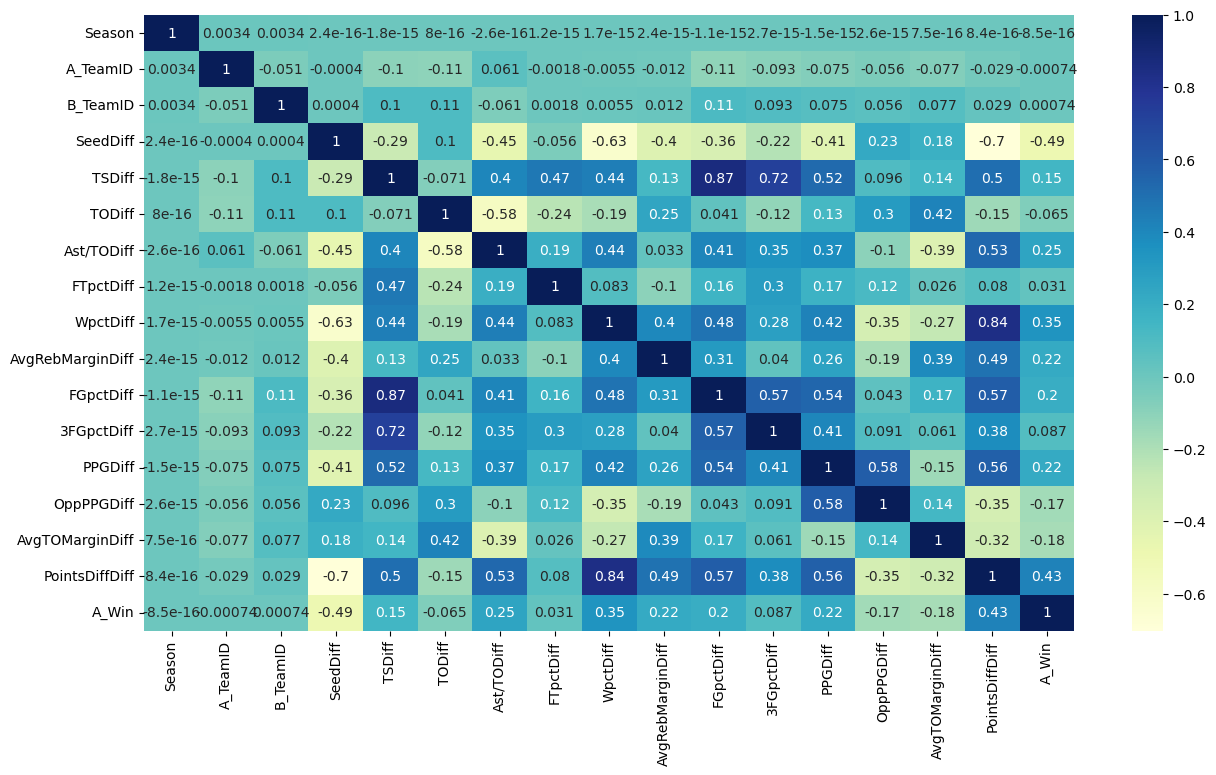

In [63]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_norm.corr(), annot=True, cmap="YlGnBu")

Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix

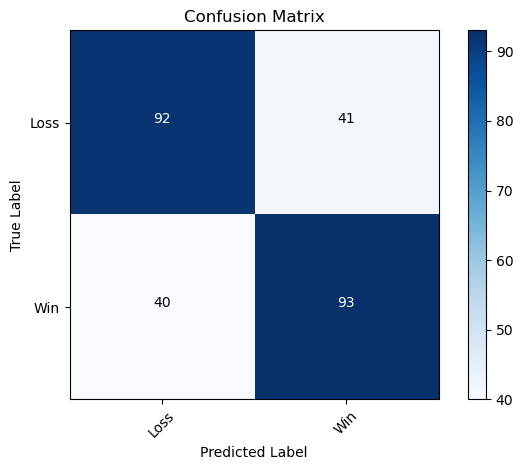

In [70]:
true_labels = test_data_norm['A_Win']
predicted_labels = preds

cm = confusion_matrix(true_labels, predicted_labels)

classes = ['Loss', 'Win']

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i,j], 'd'),
                 horizontalalignment='center', 
                 color='white' if cm[i,j] > thresh else 'black')
        
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

ROC Curve

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

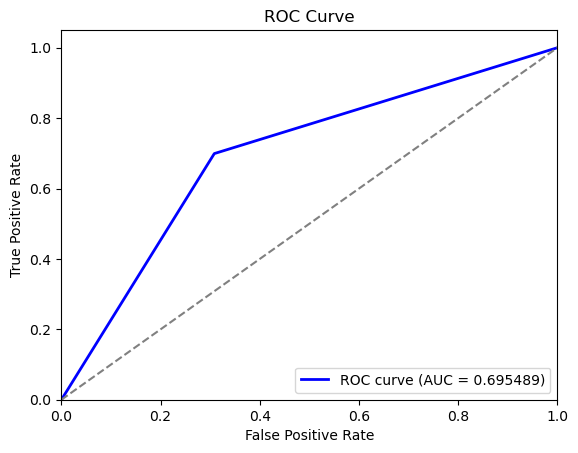

In [73]:
predicted_probabilities = [1 if label == 1 else 0 for label in predicted_labels]

fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)

auc_score = roc_auc_score(true_labels, predicted_probabilities)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()